# Pillow kütüpanesi pythonda resim okuma ve gerekli manipilaosyonları yapmaya yarar.

In [1]:
import PIL
from PIL import Image

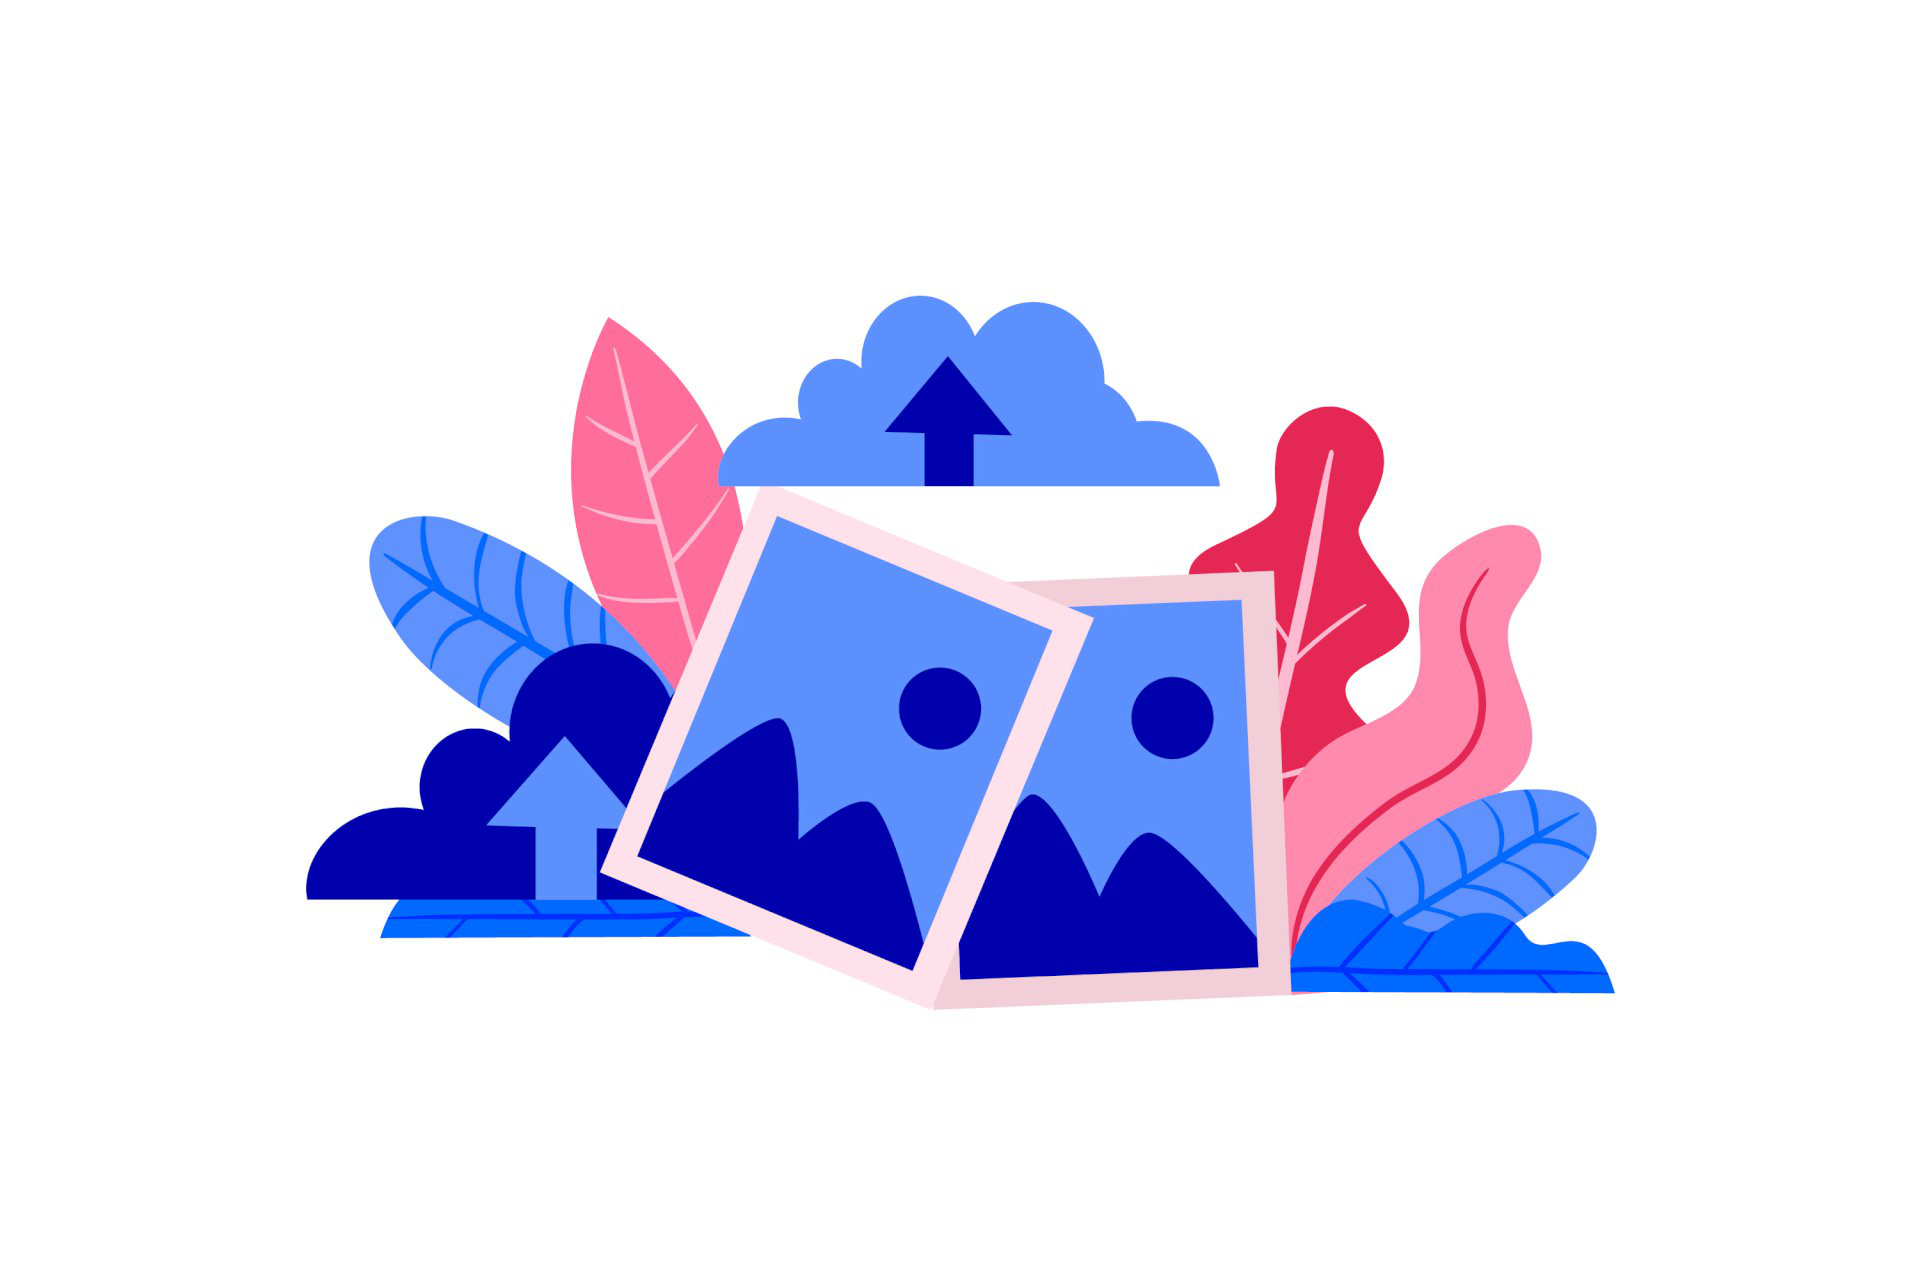

In [3]:
# PIL kütüpanesi image dökümantosyenel işlem yapıyorum ve görsellin ekrana bastırmayı sağladım.
Image.open("./gorsel.jpg")

In [4]:
# Burada bu görsellei kod alanım için bir değişkene atamasını yapıyorum.
img = Image.open("./gorsel.jpg")

In [5]:
# Ataması yapılan görsel için bu görselin "show" komutu ile yapılan işlemde farklı ekranda açılmasını sağlıyorum.
img.show()

In [8]:
# urada ise elimdeki görselin özelliklerini bulluyorum.
print(img.size) # --> görsellin boyutunu.
print(img.mode) # Görselin modu "yani renklendirme biçimi" diyebiliriz.


(1920, 1280)
RGB


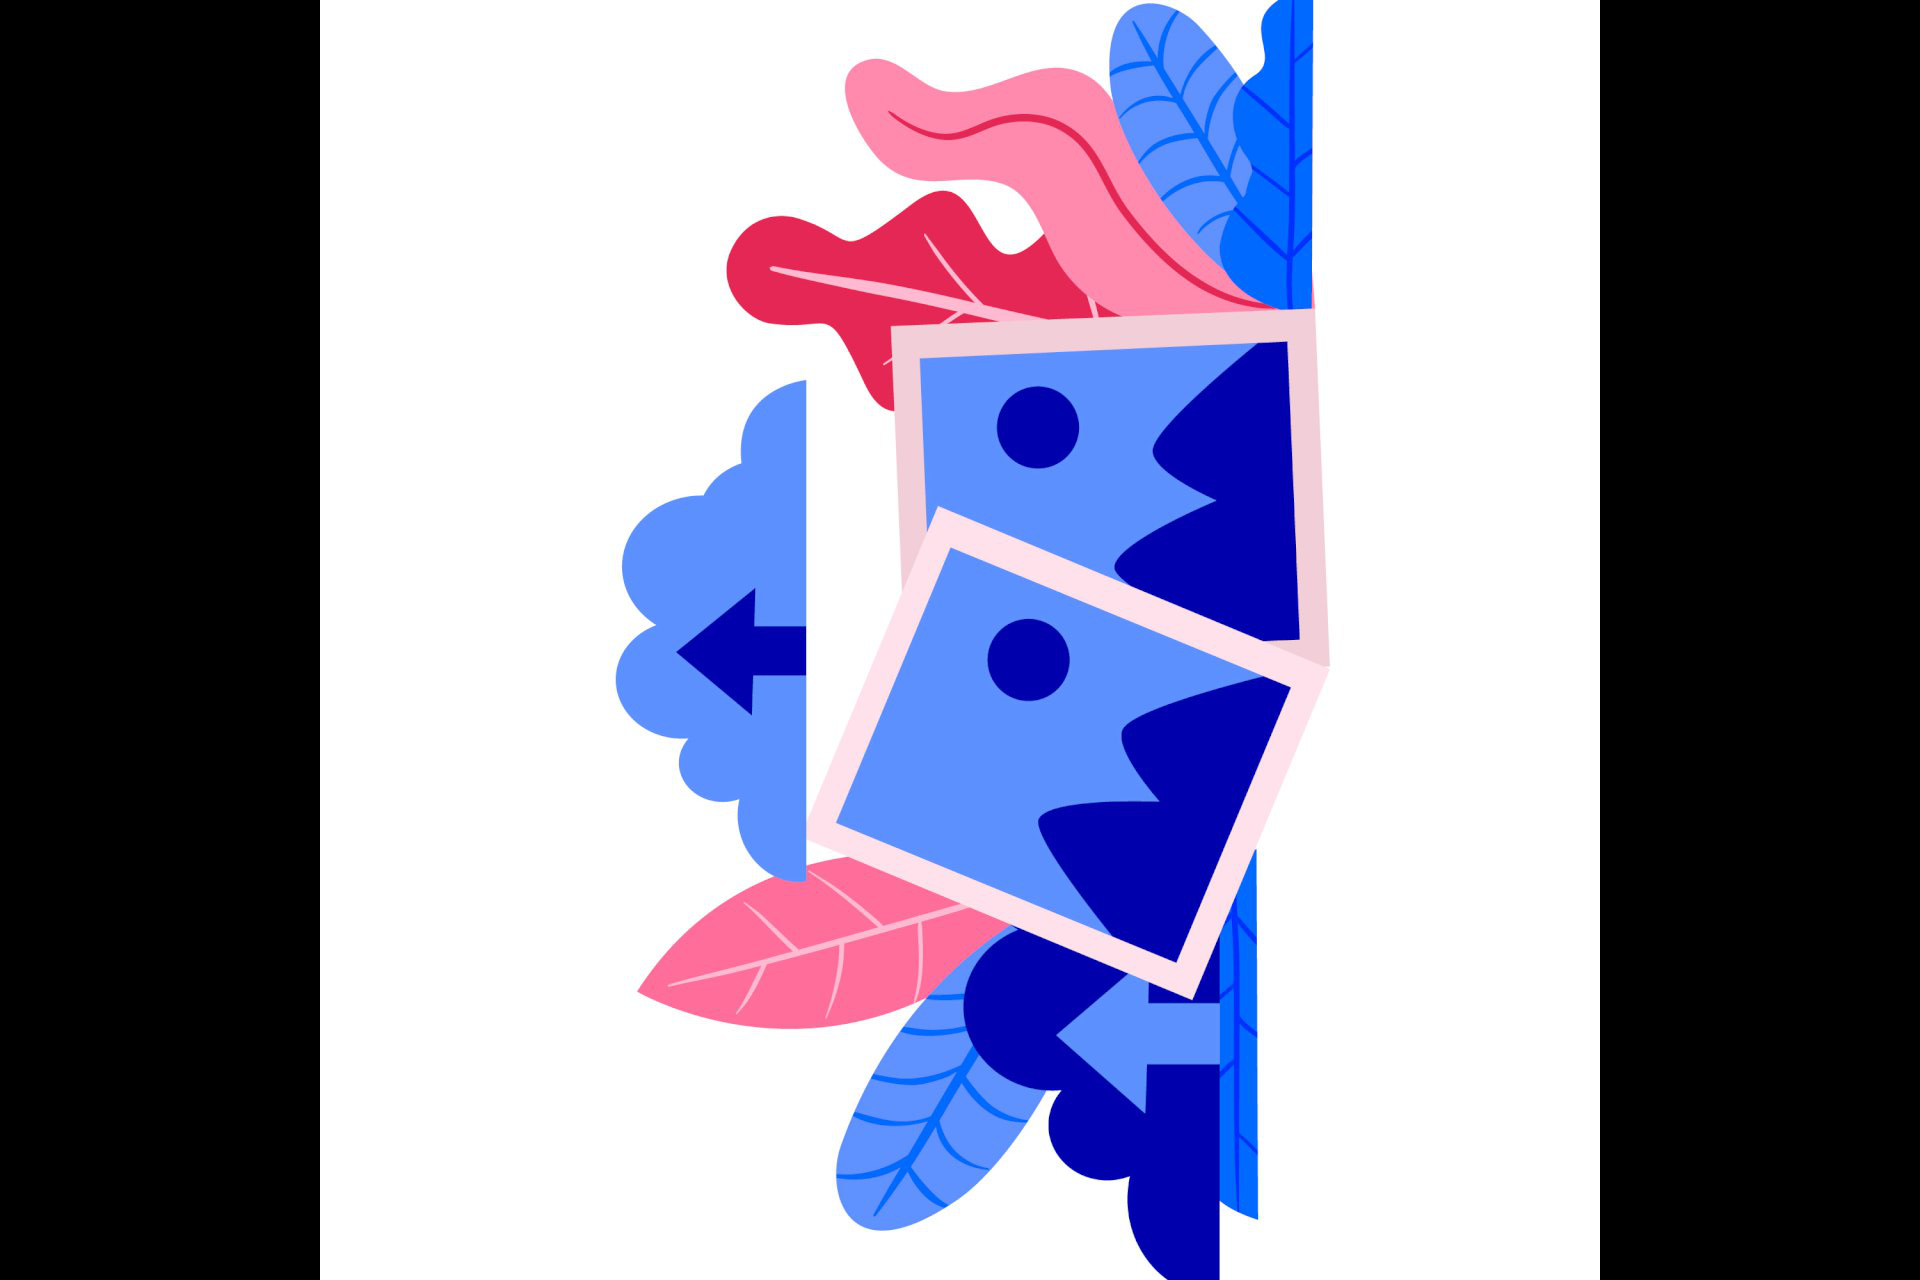

In [9]:
# Burda ise elimdeki görseli 'rotate' methodunu kullanrak olduğu yerde döndürme işlemini yapıcam.

img.rotate(90) # Bu kod satırı ile elimdeki kodu 90 derece döndürdüm.

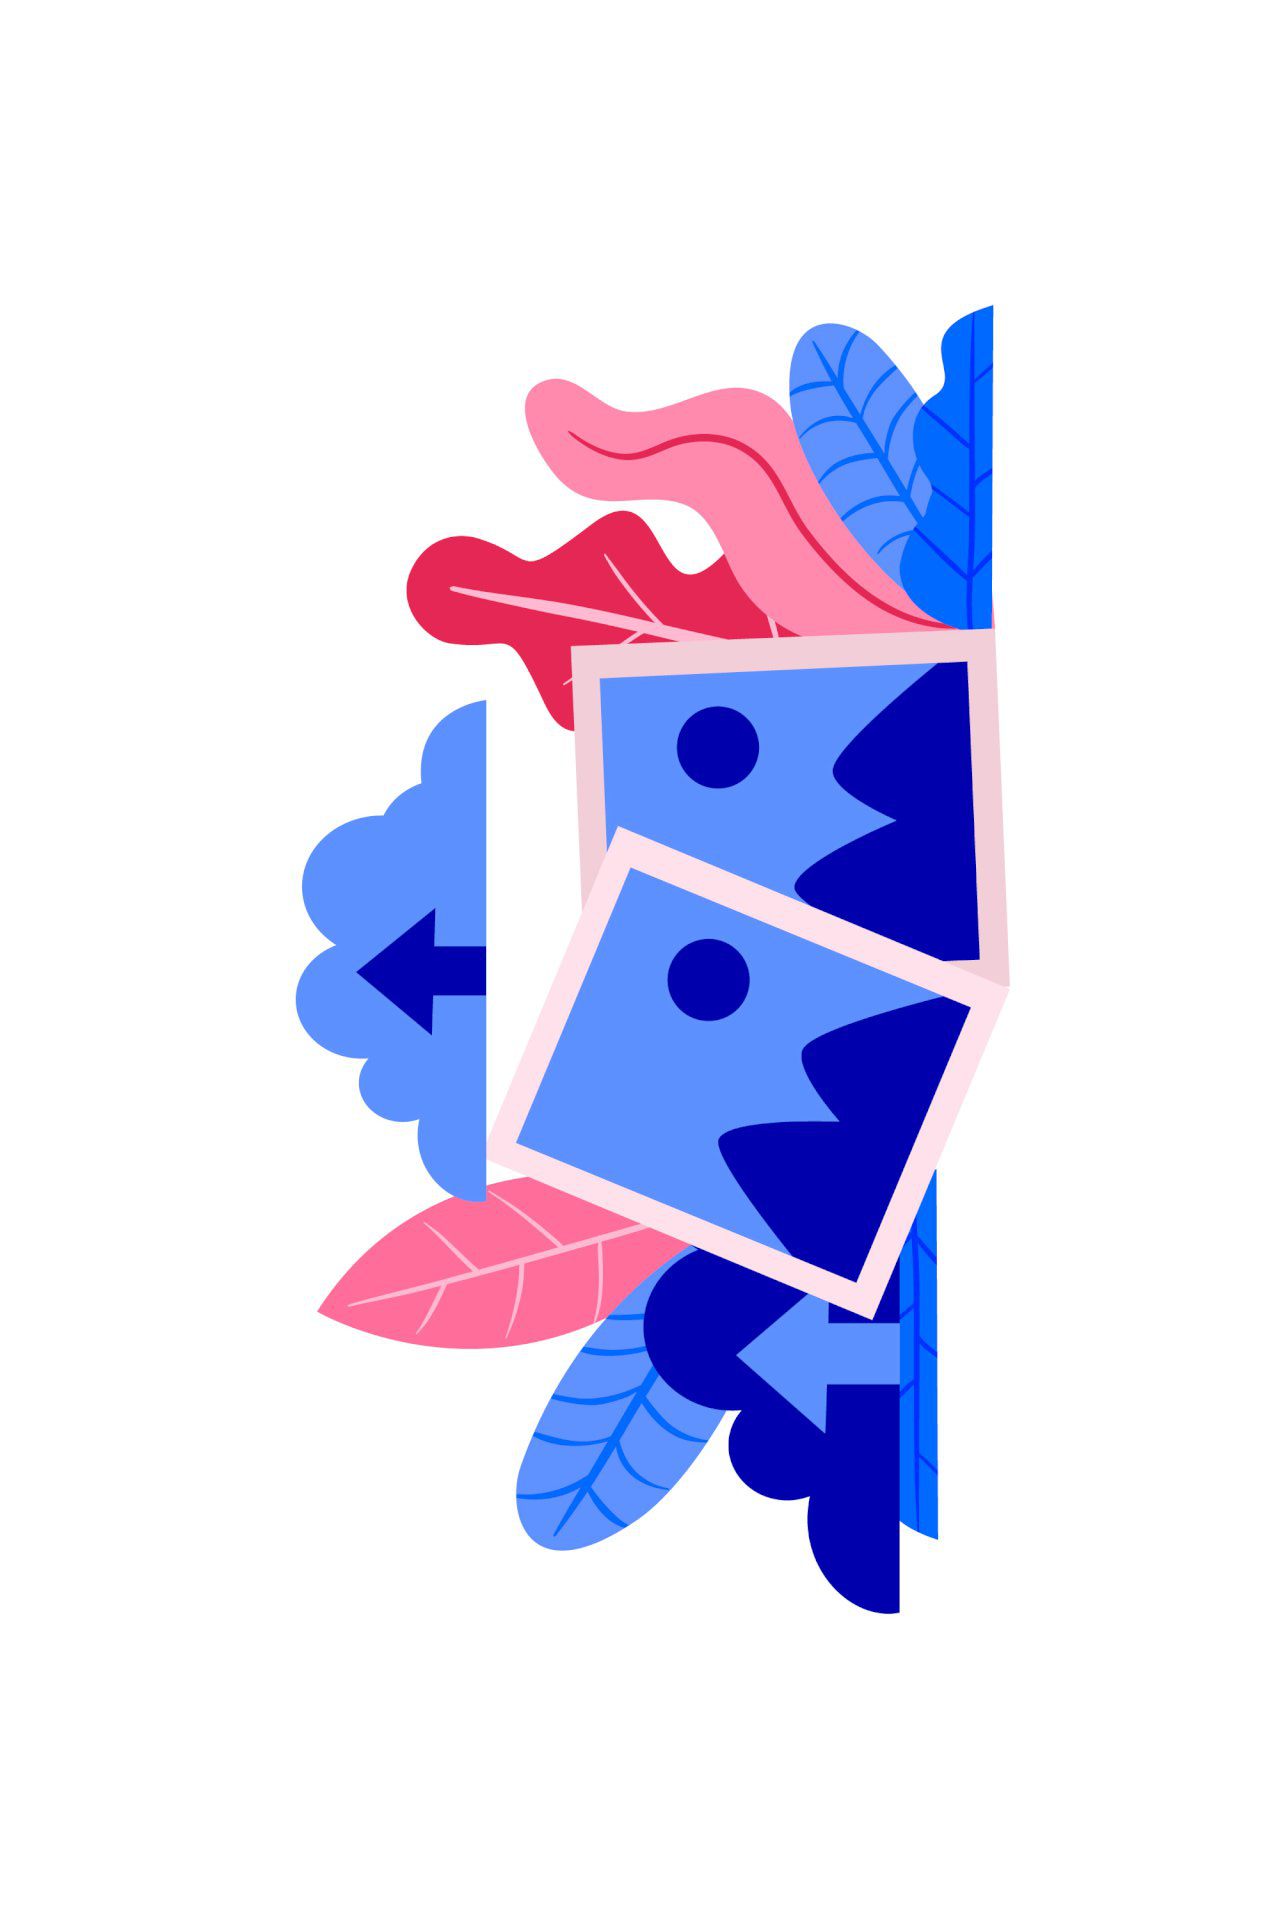

In [11]:
# Yukardaki rotate işleminde görselin boyutları korundu eğer bunu istemezsem yani görseli 1920*1080 gibi düşünün.

img.rotate(90, expand=1)

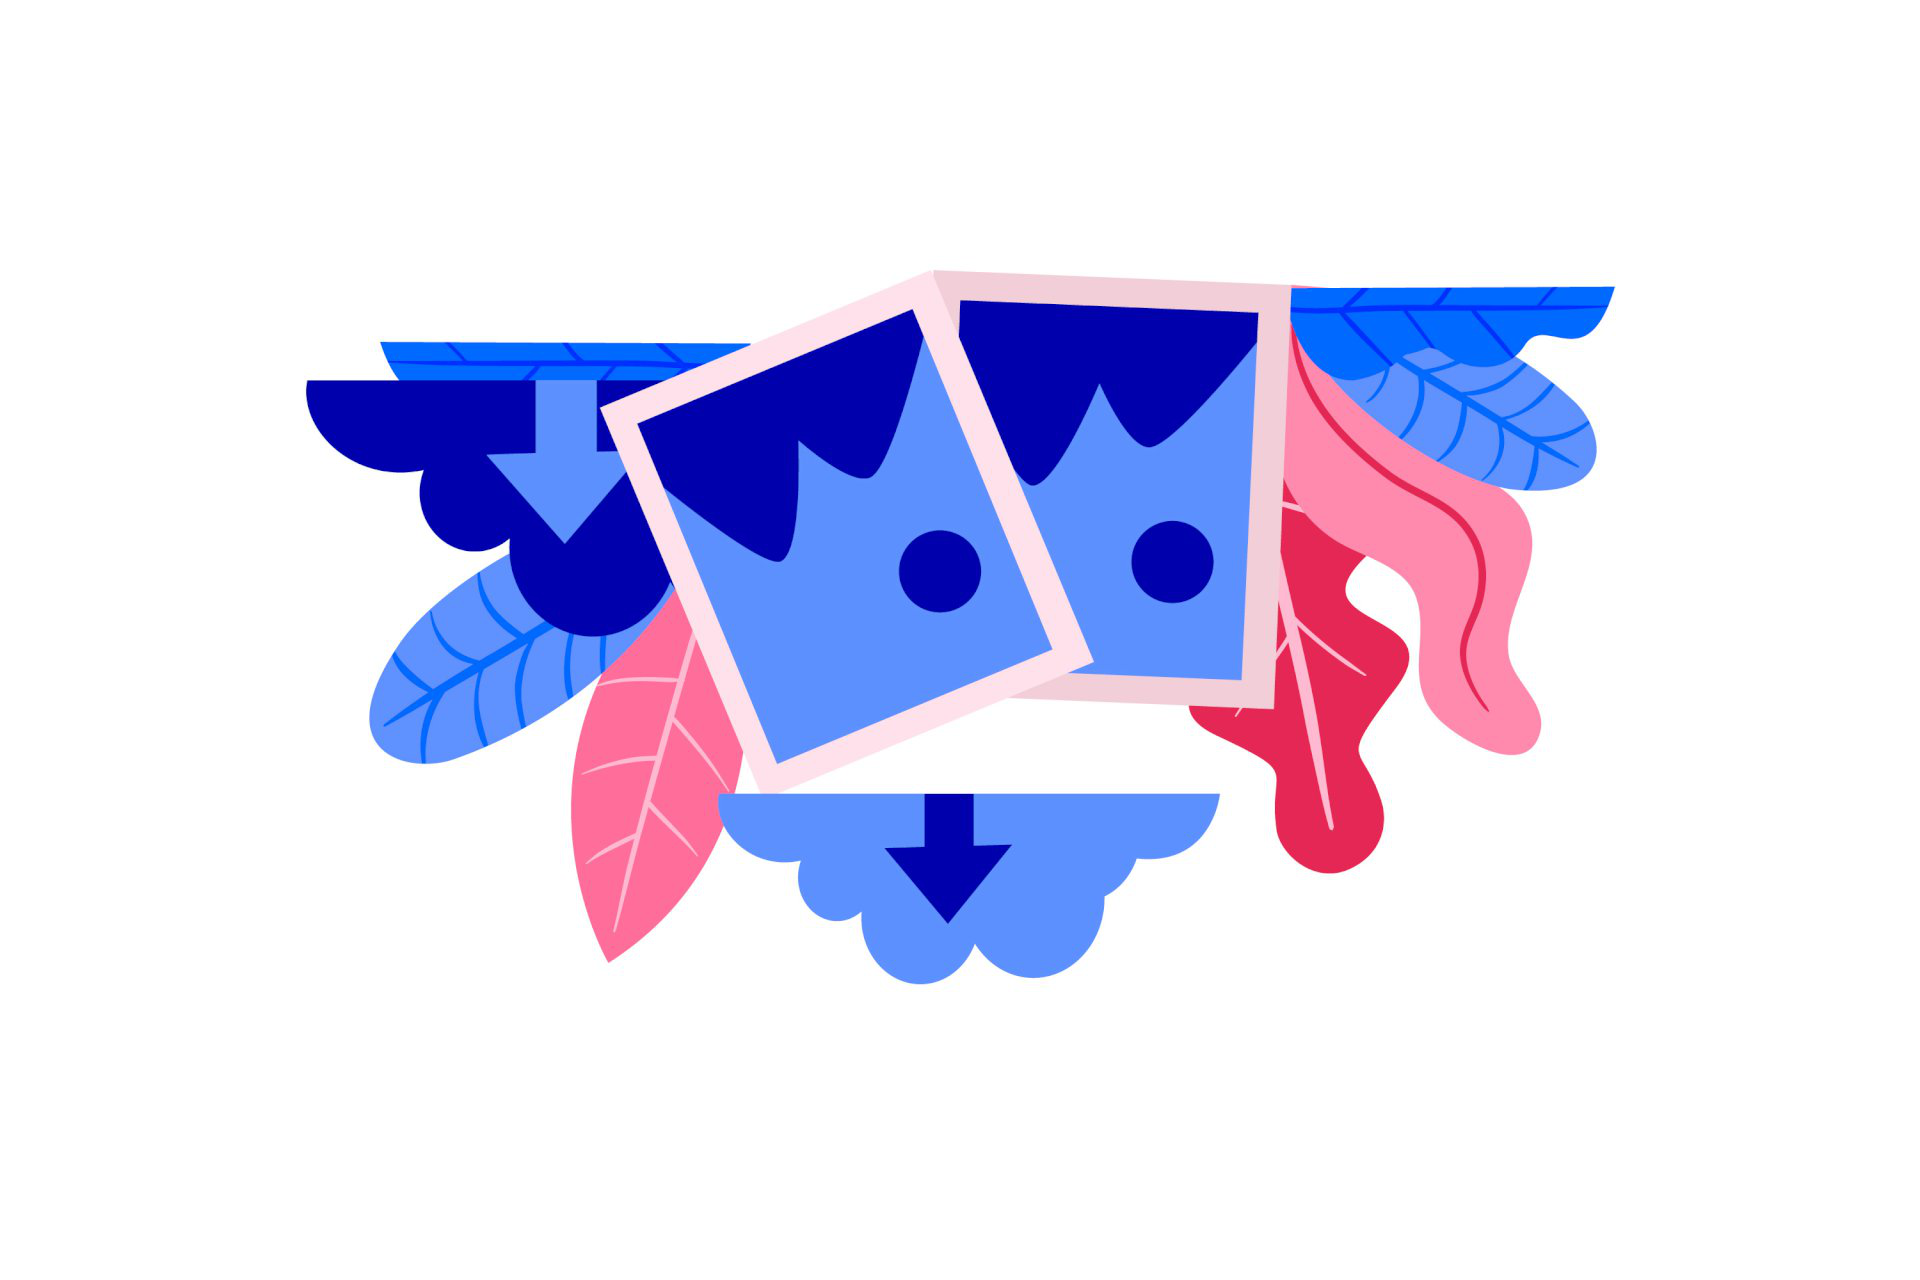

In [16]:
# Eğer fotografın tamamen simetrisini almak istersek. Ytını üstüne getirmek diye biliriz.

img.transpose(method=Image.FLIP_TOP_BOTTOM)

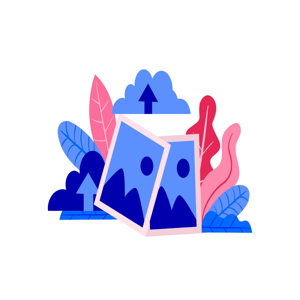

In [17]:
# Eğer bu görselin boyutunu değiştirmek istersem yapamam gerek yani kullanmam gereken kütüpane şu olmalı.

img.resize((300,300)) # Burada elimdeki görseli 300'e 300 boyutunda küçültme işlemlerini yaptım.

In [21]:
# Yanlız bu şekilde yapılan işlem sonucunda fotoğrafın proporsyonu bozulmuş oluyor bunun önüne geçmek istersem.

width, height = img.size  # Var olan boyut değerlerini iki değişkene ataasını yapıyorum.
print(width)
print(height)



1920
1280


In [24]:
new_width = int(width/3) # orantısal küçültme işlemini integer değerolarak yeni değere atıyorum.
new_height = int(height/3) # integer olması tupple olarak "resize" komutunun benden istemesi.

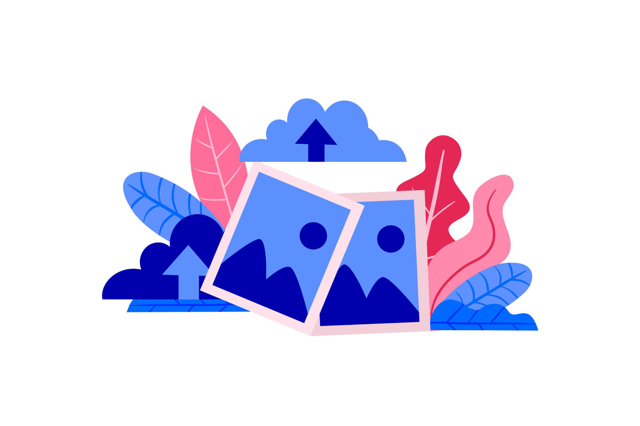

In [26]:
img.resize((new_width,new_height))

In [27]:
# Küçültülmüş olan görseli bir değişkene atamasını yapıyorum.

small_img = img.resize((new_width,new_height))

In [28]:
small_img.show()

In [29]:
# Bu yeni görseli kaydediyorum.

small_img.save("./small_image.jpeg")

In [32]:
# Şimdi bu görseli ben 2 bölerek orantılıyorum. Bunun farklı bir yolu daha var.

MAX_SİZE = (1000, 1000) # Bu alanı maksimum değerini sabitliyorum
img2 = img.copy()       # Burda yaptığım işlem karışmasın diye img2 değişkeni tanımlıyorum.
img2.thumbnail(MAX_SİZE)# Bunu thumbnail methood kullanarak max_size alanıma orantılıyorum.

In [34]:
# Artık kenarı maksimum 1000 birimi geçmiyecek şekilde tanımlıyorum.

img2.size

(1000, 667)

In [36]:
# BU işlemleri tek tek yapmak kolay şimid bu işlemleri çoklu şekilde nasıl yapılmalı onun üzerine eğilecek olursam.

import os

folder_path = "./resimler"
paths = os.listdir(folder_path)

In [37]:
paths

['405px-Synchiropus_splendidus_2_Luc_Viatour.jpg',
 '800px-Discus_fish.jpg',
 'images.jpg',
 'indir (1).jpg',
 'indir.jpg',
 'istockphoto-157589352-612x612.jpg',
 'pexels-lone-jensen-2156311.jpg']

In [46]:
# Burda resim dosyalarını tek tek okumam gerekiyor ve bunu sağlayan bir döngü sağlamam geekiyorsa.

for path in paths:
    if path.endswith(".jpg"):  # Sonu jpeg ile biten leri getirmesini istiyorum.
        img = Image.open(os.path.join(folder_path, path))  # burayı ise boyle yazmamın nedeni şu dosyanın altındaki şu veriye git demek aslında.
        # burayı relatif olarak görseli alıyorum yoksa relatif alamam.
        thump = img.copy()
        thump.thumbnail((1000,1000))   # yukardaki göndü sağlandığında burayı yap boyutu max 1000 yap.
        thump = thump.transpose(Image.FLIP_LEFT_RIGHT) # Birde  bu görseli transpoze et diyorum.
        thump.save(f'./islenen_resimler/{path}')